In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation, Add
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



In [ ]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

early_stop = EarlyStopping(patience=4, restore_best_weights=True)



In [ ]:


def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)


    taper_units = [512]*5 + [384]*5 + [256]*5 + [128]*5 + [96]*5 + [64]*5  

    for units in taper_units:
        x = Dense(units)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Dropout(0.3)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)



In [ ]:


def residual_block(x, units):
    shortcut = x

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)

    if x.shape[-1] != shortcut.shape[-1]:
        shortcut = Dense(units)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet():
    inputs = Input(shape=(784,))
    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    taper_units = [512]*5 + [384]*3 + [256]*3 + [128]*2 + [96]*1 + [64]*1  

    for units in taper_units:
        x = residual_block(x, units)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [ ]:

dnn_model = create_dnn()
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dnn_history = dnn_model.fit(x_train, y_train, epochs=20, batch_size=128, 
                            validation_split=0.1, callbacks=[early_stop], verbose=1)



Epoch 1/20
422/422 [==============================] - 39s 51ms/step - loss: 2.3026 - accuracy: 0.1342 - val_loss: 2.3579 - val_accuracy: 0.1055
Epoch 2/20
422/422 [==============================] - 17s 39ms/step - loss: 1.9567 - accuracy: 0.1892 - val_loss: 2.8127 - val_accuracy: 0.0973
Epoch 3/20
422/422 [==============================] - 17s 39ms/step - loss: 1.7959 - accuracy: 0.2052 - val_loss: 1.8823 - val_accuracy: 0.1845
Epoch 4/20
422/422 [==============================] - 17s 39ms/step - loss: 1.7667 - accuracy: 0.2140 - val_loss: 1.7479 - val_accuracy: 0.2237
Epoch 5/20
422/422 [==============================] - 17s 40ms/step - loss: 1.7610 - accuracy: 0.2437 - val_loss: 1.8274 - val_accuracy: 0.1898
Epoch 6/20
422/422 [==============================] - 17s 39ms/step - loss: 1.7276 - accuracy: 0.2629 - val_loss: 1.6247 - val_accuracy: 0.2770
Epoch 7/20
422/422 [==============================] - 17s 40ms/step - loss: 1.7434 - accuracy: 0.2671 - val_loss: 2.0679 - val_accuracy:

In [ ]:

resnet_model = create_resnet()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_history = resnet_model.fit(x_train, y_train, epochs=20, batch_size=128, 
                                  validation_split=0.1, callbacks=[early_stop], verbose=1)


Epoch 1/20
422/422 [==============================] - 39s 50ms/step - loss: 0.9463 - accuracy: 0.6590 - val_loss: 0.5490 - val_accuracy: 0.8130
Epoch 2/20
422/422 [==============================] - 19s 44ms/step - loss: 0.4928 - accuracy: 0.8310 - val_loss: 0.4539 - val_accuracy: 0.8488
Epoch 3/20
422/422 [==============================] - 18s 43ms/step - loss: 0.4170 - accuracy: 0.8546 - val_loss: 0.4261 - val_accuracy: 0.8585
Epoch 4/20
422/422 [==============================] - 18s 43ms/step - loss: 0.3762 - accuracy: 0.8688 - val_loss: 0.3851 - val_accuracy: 0.8537
Epoch 5/20
422/422 [==============================] - 19s 45ms/step - loss: 0.3538 - accuracy: 0.8749 - val_loss: 0.3833 - val_accuracy: 0.8713
Epoch 6/20
422/422 [==============================] - 19s 44ms/step - loss: 0.3342 - accuracy: 0.8808 - val_loss: 0.3601 - val_accuracy: 0.8782
Epoch 7/20
422/422 [==============================] - 18s 43ms/step - loss: 0.3179 - accuracy: 0.8866 - val_loss: 0.3734 - val_accuracy:

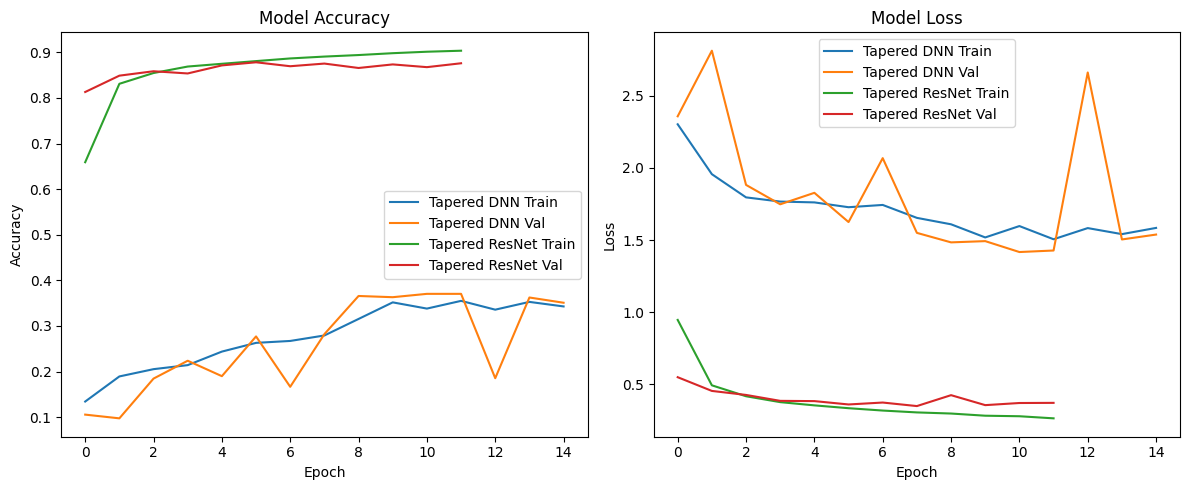

In [8]:
def plot_history(history1, history2, label1="Tapered DNN", label2="Tapered ResNet"):
    plt.figure(figsize=(12, 5))
    
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['accuracy'], label=f'{label1} Train')
    plt.plot(history1.history['val_accuracy'], label=f'{label1} Val')
    plt.plot(history2.history['accuracy'], label=f'{label2} Train')
    plt.plot(history2.history['val_accuracy'], label=f'{label2} Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['loss'], label=f'{label1} Train')
    plt.plot(history1.history['val_loss'], label=f'{label1} Val')
    plt.plot(history2.history['loss'], label=f'{label2} Train')
    plt.plot(history2.history['val_loss'], label=f'{label2} Val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(dnn_history, resnet_history)


In [9]:
print("Tapered 30-Layer DNN Accuracy:")
dnn_model.evaluate(x_test, y_test)

print("Tapered 30-Layer ResNet Accuracy:")
resnet_model.evaluate(x_test, y_test)


Tapered 30-Layer DNN Accuracy:
313/313 [==============================] - 3s 10ms/step - loss: 1.4253 - accuracy: 0.3702
Tapered 30-Layer ResNet Accuracy:
313/313 [==============================] - 4s 13ms/step - loss: 0.3823 - accuracy: 0.8681


[0.38233065605163574, 0.8680999875068665]